# Modelo series de tiempo

In [1]:
# Importar libería y cargar datos

import pandas as pd

df = pd.read_csv('../data/raw/River_Arno.csv')
df.head()

,Date,Rainfall_Le_Croci,Rainfall_Cavallina,Rainfall_S_Agata,Rainfall_Mangona,Rainfall_S_Piero,Rainfall_Vernio,Rainfall_Stia,Rainfall_Consuma,Rainfall_Incisa,Rainfall_Montevarchi,Rainfall_S_Savino,Rainfall_Laterina,Rainfall_Bibbiena,Rainfall_Camaldoli,Temperature_Firenze,Hydrometry_Nave_di_Rosano
0,01/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.82
1,02/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.94
2,03/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.11
3,04/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.84
4,05/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.88


In [2]:
# Convertir en seride de tiempo

ts = pd.DataFrame()
ts['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
ts['Hydrometry_Nave_di_Rosano'] = df['Hydrometry_Nave_di_Rosano']

ts.set_index('Date', inplace=True)

ts


,Hydrometry_Nave_di_Rosano
Date,
1998-01-01,1.82
1998-01-02,1.94
1998-01-03,2.11
1998-01-04,1.84
1998-01-05,1.88
...,...
2020-06-26,1.34
2020-06-27,1.21
2020-06-28,1.30


In [3]:
pip install stattools

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
# Valores faltantes

ts.isnull().sum()

Hydrometry_Nave_di_Rosano    48
dtype: int64

In [6]:
ts = ts.interpolate(method='linear')
ts.isnull().sum()

Hydrometry_Nave_di_Rosano    0
dtype: int64

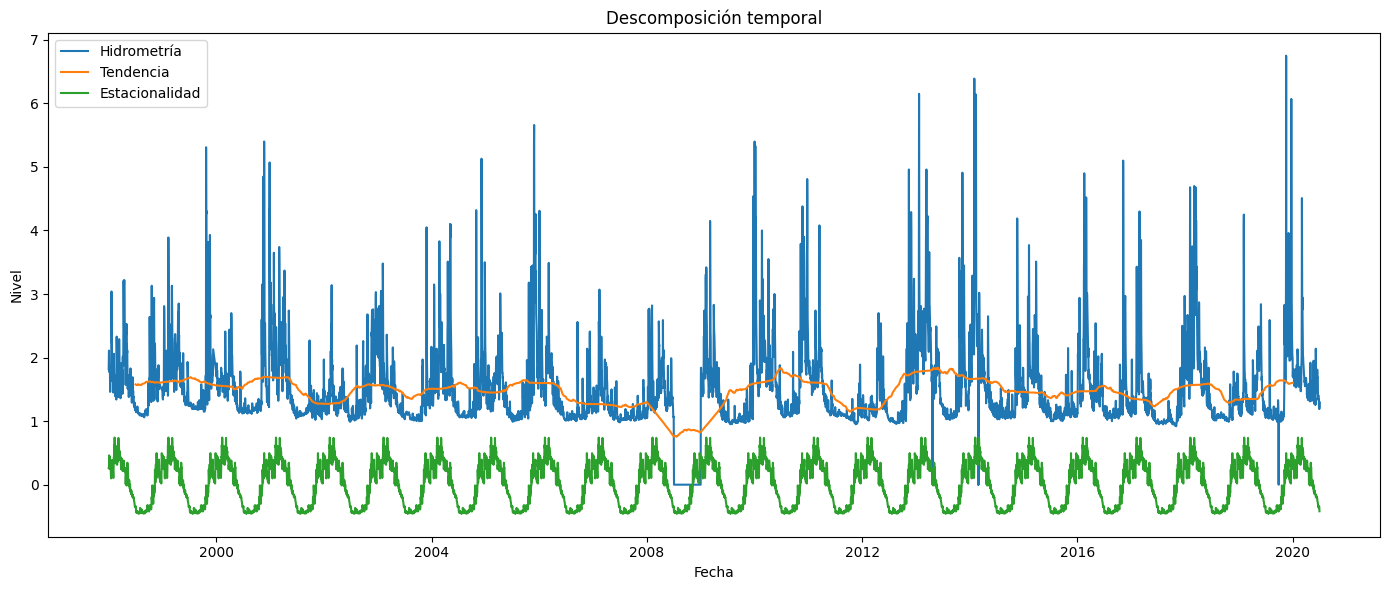

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import seaborn as sns

# Descomposición estacional (asegúrate que el índice esté en formato datetime)
decomp = seasonal_decompose(ts['Hydrometry_Nave_di_Rosano'], period=365)

# Extraer componentes
trend = decomp.trend
seasonal = decomp.seasonal

# Configurar el gráfico
plt.figure(figsize=(14, 6))
sns.lineplot(x=ts.index, y=ts['Hydrometry_Nave_di_Rosano'], label="Hidrometría")
sns.lineplot(x=trend.index, y=trend, label="Tendencia")
sns.lineplot(x=seasonal.index, y=seasonal, label="Estacionalidad")
plt.title("Descomposición temporal")
plt.xlabel("Fecha")
plt.ylabel("Nivel")
plt.legend()
plt.tight_layout()
plt.show()


In [8]:
# Validar si es estacionaria

from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    print("Resultados de la prueba de Dickey-Fuller:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

test_stationarity(ts)

Resultados de la prueba de Dickey-Fuller:


Test Statistic                -7.825536e+00
p-value                        6.496928e-12
#Lags Used                     3.700000e+01
Number of Observations Used    8.179000e+03
Critical Value (1%)           -3.431150e+00
Critical Value (5%)           -2.861893e+00
Critical Value (10%)          -2.566958e+00
dtype: float64

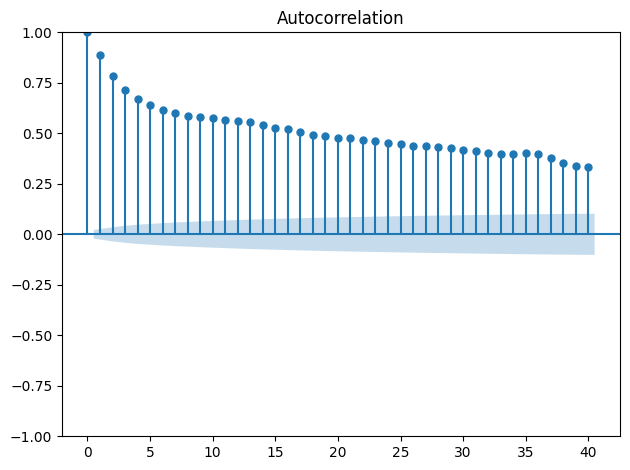

In [9]:
# Validar autocorrelación

from statsmodels.graphics.tsaplots import plot_acf

plot_acf(ts)

plt.tight_layout()
plt.show()

NOTA: Si la autocorrelación cae muy rápido, quiere decir que un modelo de serie de tiempo no es buena opción

In [10]:
# Modelo auto arima

from pmdarima import auto_arima

# Suponiendo que ts tiene un índice datetime y una columna con los valores
model = auto_arima(
    ts['Hydrometry_Nave_di_Rosano'],  # Serie univariada
    seasonal=True,                   # Desactiva estacionalidad si no hay evidencia clara
    trace=True,
    m=3                               # m=3 aplica solo si hay estacionalidad trimestral
)


/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[3] intercept   : AIC=2137.231, Time=11.65 sec


/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,0)[3] intercept   : AIC=2914.101, Time=0.56 sec


/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,0)[3] intercept   : AIC=2816.290, Time=1.50 sec


/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,1)[3] intercept   : AIC=2796.251, Time=1.86 sec


/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,0)[3]             : AIC=2912.102, Time=0.41 sec


/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,1)[3] intercept   : AIC=2110.519, Time=11.72 sec


/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[3] intercept   : AIC=2108.485, Time=7.40 sec


/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(1,0,0)[3] intercept   : AIC=2110.520, Time=8.54 sec


/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[3] intercept   : AIC=2106.713, Time=3.86 sec


/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(1,0,0)[3] intercept   : AIC=2108.278, Time=7.01 sec


/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,1)[3] intercept   : AIC=2108.278, Time=6.96 sec


/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(1,0,1)[3] intercept   : AIC=2110.378, Time=7.80 sec


/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,0)[3] intercept   : AIC=2534.854, Time=2.76 sec


/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[3] intercept   : AIC=2247.525, Time=4.02 sec


/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[3] intercept   : AIC=2912.583, Time=0.83 sec


/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[3] intercept   : AIC=2112.645, Time=3.57 sec


/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[3]             : AIC=2104.717, Time=1.33 sec


/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(1,0,0)[3]             : AIC=2106.282, Time=2.26 sec


/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,1)[3]             : AIC=2106.282, Time=2.30 sec


/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(1,0,1)[3]             : AIC=2108.389, Time=2.80 sec


/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,0)[3]             : AIC=2532.856, Time=0.47 sec


/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[3]             : AIC=2245.530, Time=0.96 sec


/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[3]             : AIC=2106.488, Time=1.23 sec


/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[3]             : AIC=2910.583, Time=0.95 sec


/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[3]             : AIC=2110.649, Time=1.50 sec

Best model:  ARIMA(1,1,2)(0,0,0)[3]          
Total fit time: 94.295 seconds


In [11]:
# Ejecutar modelo

forecast = model.predict(n_periods=365)
forecast

/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


2020-07-01    1.348385
2020-07-02    1.366374
2020-07-03    1.377566
2020-07-04    1.384529
2020-07-05    1.388861
                ...   
2021-06-26    1.395996
2021-06-27    1.395996
2021-06-28    1.395996
2021-06-29    1.395996
2021-06-30    1.395996
Freq: D, Length: 365, dtype: float64

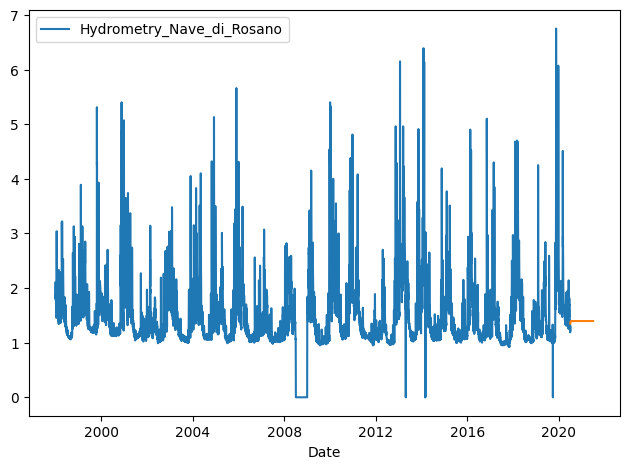

In [12]:
# Graficar resultados

sns.lineplot(data=ts)
sns.lineplot(data=forecast)

plt.tight_layout()
plt.show()

NOTA: Se evidencia que el modelo ARIMA no tiene buenos resultados para predicciones en periodos de un año o mayor

In [13]:
!pip install neuralprophet

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.8/145.8 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 25.4 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 37.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.6 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 27.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 41.7 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 825.4/825.4 kB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 62.4 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 821.2/821.2 MB 523.5 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.9/981.9 kB 43.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 15.3 MB/s

In [17]:
!pip install plotly-resampler

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 31.8 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.9/130.9 kB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 24.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 41.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.2/102.2 kB 22.2 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 6.2.0
    Uninstalling plotly-6.2.0:
      Successfully uninstalled plotly-6.2.0

[notice] A new release of pip is available: 23.1.2 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [14]:
# Evaluar otro modelo

ts_np = ts.reset_index()

ts_np

,Date,Hydrometry_Nave_di_Rosano
0,1998-01-01,1.82
1,1998-01-02,1.94
2,1998-01-03,2.11
3,1998-01-04,1.84
4,1998-01-05,1.88
...,...,...
8212,2020-06-26,1.34
8213,2020-06-27,1.21
8214,2020-06-28,1.30
8215,2020-06-29,1.19


WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /home/vscode/.local/lib/python3.11/site-packages/neuralprophet/df_utils.py:464: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  if df.groupby("ID").apply(lambda x: x.duplicated("ds").any()).any():

WARNING - (py.warnings._showwarnmsg) - /home/vscode/.local/lib/python3.11/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infe

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (129) is too small than the required number                     for the learning rate finder (247). The results might not be optimal.


Finding best initial lr:   0%|          | 0/247 [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /home/vscode/.local/lib/python3.11/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.988% of the data.
WARNING - (py.warnings._showwarnmsg) - /home/vscode/.local/lib/python3.11/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /home/vscode/.local/lib/python3.11/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the d

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.
WARNING - (py.warnings._showwarnmsg) - /home/vscode/.local/lib/python3.11/site-packages/neuralprophet/plot_forecast_matplotlib.py:78: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fcst = fcst.fillna(value=np.nan)

WARNING - (py.warnings._showwarnmsg) - /home/vscode/.local/lib/python3.11/site-packages/neuralprophet/plot_forecast_matplotlib.py:84: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing 

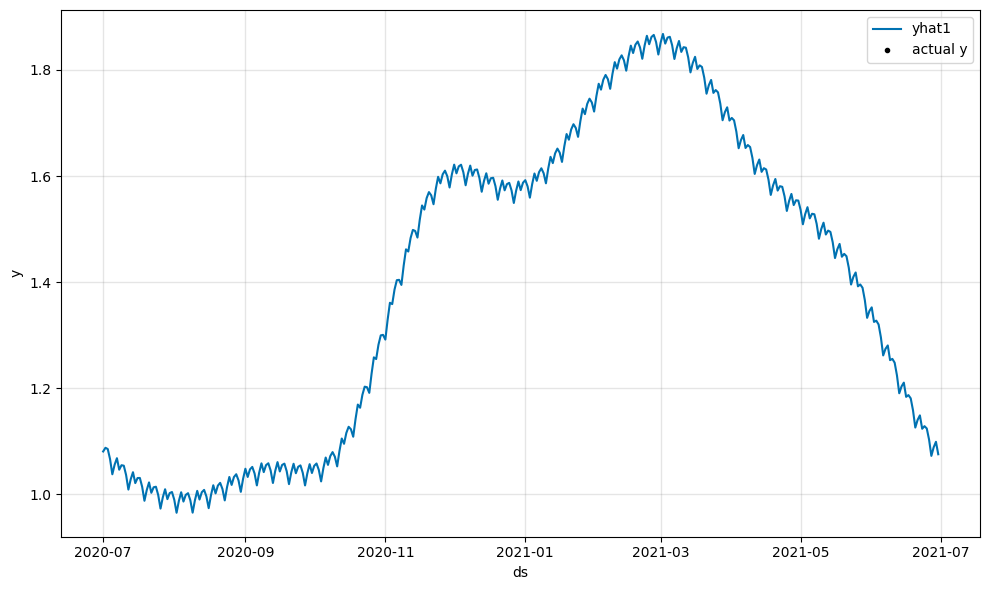

In [ ]:
from neuralprophet import NeuralProphet
import matplotlib.pyplot as plt

# Preparar datos
ts_np = ts.reset_index().rename(columns={"Date": "ds", "Hydrometry_Nave_di_Rosano": "y"})

# Crear modelo
m = NeuralProphet()

# Entrenar
metrics = m.fit(ts_np, freq="D")

# Crear futuro
future = m.make_future_dataframe(ts_np, periods=365)

# Predecir
forecast = m.predict(future)

# Graficar
fig_forecast = m.plot(forecast, plotting_backend="matplotlib")
plt.show()



<Axes: xlabel='Date', ylabel='yhat1'>

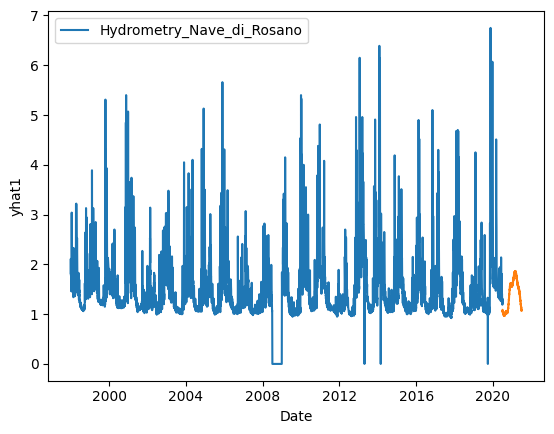

In [ ]:
# Graficar predicción

forecast

sns.lineplot(data=ts)
sns.lineplot(data=forecast,x='ds',y='yhat1')

CONCLUSIONES:
- Para definir el modelo se require identificar previamente el comportamiento de los datos e identificar si presenta estacionaridad
- Para el problema propuesto se evidencia que un modelo ARIMA no arroja una buena predicción, debido al comportamiento de los datos
- Existen más opciones para mejorar la precisión del modelo, se valida modelo Neural Prophet que tiene mejor desempeño para este tipo de datos.
- Graficar permite validar visualmente si la predicción se ajusta a los datos